In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# Data Preprocessing
# Step 1: Handle missing values (if any)
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [ ]:
# Step 2: Encoding categorical features
if 'Gender' in data.columns:
    label_encoder = LabelEncoder()
    data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:
# Step 3: Feature scaling
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
# Split data (for unsupervised learning, this step is optional but can show robustness)
train_data, test_data = train_test_split(scaled_features, test_size=0.3, random_state=42)


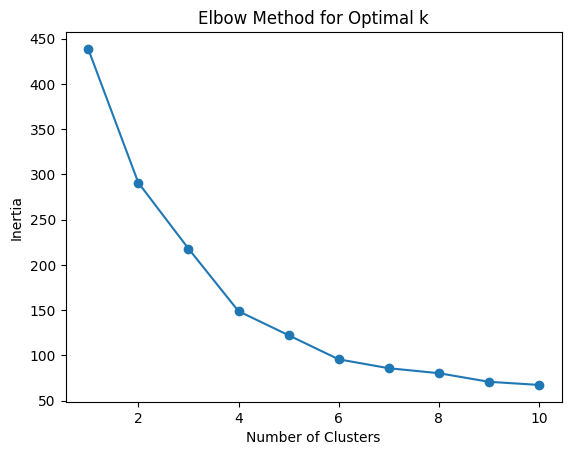

In [ ]:
# Step 4: Model Training
# Choosing the optimal number of clusters (using the Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:

# Training with the chosen number of clusters
optimal_k = 4  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
train_clusters = kmeans.fit_predict(train_data)

# Step 5: Testing the Model on the Test Set
test_clusters = kmeans.predict(test_data)

# Step 6: Evaluation Metrics
# Calculate metrics for clustering performance on train and test sets
silhouette_train = silhouette_score(train_data, train_clusters)
davies_bouldin_train = davies_bouldin_score(train_data, train_clusters)
inertia_train = kmeans.inertia_

silhouette_test = silhouette_score(test_data, test_clusters)
davies_bouldin_test = davies_bouldin_score(test_data, test_clusters)

In [ ]:
print(f"Train Silhouette Score: {silhouette_train:.3f}")
print(f"Train Davies-Bouldin Index: {davies_bouldin_train:.3f}")
print(f"Train Inertia: {inertia_train:.3f}")

print(f"Test Silhouette Score: {silhouette_test:.3f}")
print(f"Test Davies-Bouldin Index: {davies_bouldin_test:.3f}")

all_clusters = kmeans.predict(scaled_features)  # Predict for all data


Train Silhouette Score: 0.412
Train Davies-Bouldin Index: 0.913
Train Inertia: 148.769
Test Silhouette Score: 0.378
Test Davies-Bouldin Index: 0.944


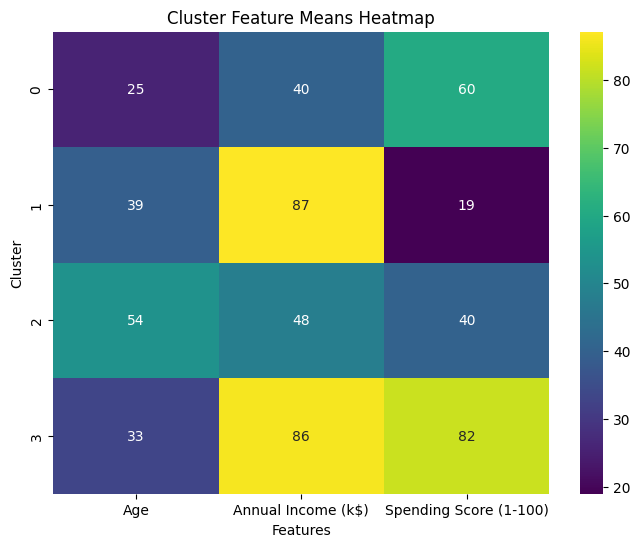

In [ ]:
import seaborn as sns
data['Cluster'] = all_clusters

# Calculate average values of features for each cluster
cluster_means = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Cluster Feature Means Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

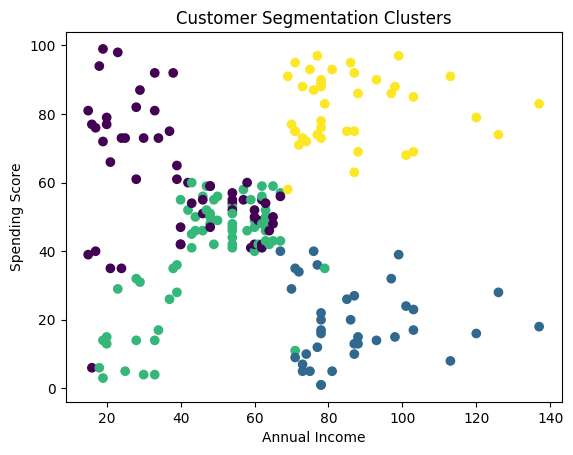

In [ ]:

# Scatter plot using all data points and their predicted clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=all_clusters)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Clusters')
plt.show()